In [1]:
#!pip install tensorflow

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np



In [3]:
img = image.load_img(r"C:\Users\Mr\Downloads\archive\train\f3d244f1-8a4b-4331-9851-810c827f80db_png.rf.558ede861efb75897f43ef0ef6e1a333.jpg")

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("C:\Users\Mr\Downloads\archive\train\f3d244f1-8a4b-4331-9851-810c827f80db_png.rf.558ede861efb75897f43ef0ef6e1a333.jpg").shape

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_dataset=train.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\train',
                                        target_size=(200,200),
                                        batch_size= 3,
                                        class_mode='categorical')
validation_dataset=validation.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\valid',
                                        target_size=(200,200),
                                        batch_size= 3,
                                        class_mode='categorical')


Found 158 images belonging to 4 classes.
Found 129 images belonging to 4 classes.


In [7]:
train_dataset.class_indices

{'Shell Disease': 0, 'blackspot': 1, 'healthy shrimp': 2, 'whitespot': 3}

In [9]:

num_classes = 4

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),  # Additional dense layer
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Multi-class classification
])


In [11]:
#!pip install tensor-dash

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

from tensordash.tensordash import Tensordash
histories = Tensordash(ModelName='state', email='harshithamandula7@gmail.com')

Enter Tensordash Password :········


In [13]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)



Epoch 1/30


5/5 [==============================] - 9s 2s/step - loss: 2.7060 - accuracy: 0.2667 - val_loss: 1.2702 - val_accuracy: 0.4000
Epoch 2/30
5/5 [==============================] - 6s 2s/step - loss: 1.3852 - accuracy: 0.4667 - val_loss: 1.2980 - val_accuracy: 0.2667
Epoch 3/30
5/5 [==============================] - 7s 2s/step - loss: 1.3866 - accuracy: 0.2667 - val_loss: 1.2040 - val_accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 10s 2s/step - loss: 1.4440 - accuracy: 0.3571 - val_loss: 1.2826 - val_accuracy: 0.4667
Epoch 5/30
5/5 [==============================] - 11s 3s/step - loss: 1.3942 - accuracy: 0.4000 - val_loss: 1.3462 - val_accuracy: 0.3333
Epoch 6/30
5/5 [==============================] - 9s 2s/step - loss: 1.2713 - accuracy: 0.4667 - val_loss: 1.1341 - val_accuracy: 0.5333
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 1.4404 - accuracy: 0.2667 - val_loss: 1.2685 - val_accuracy: 0.4667
Epoch 8/30
5/5 [=====================

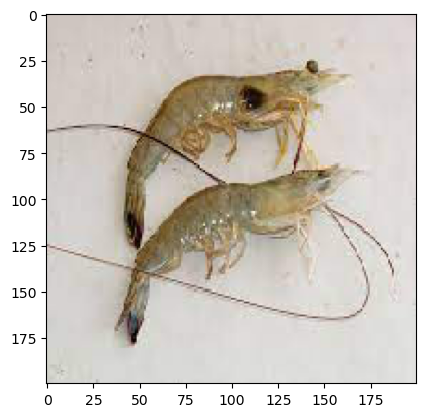

1/1 [==============================] - 0s 52ms/step
healthy shrimp


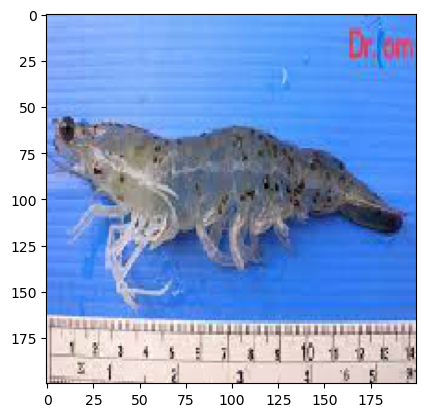

1/1 [==============================] - 0s 68ms/step
blackspot


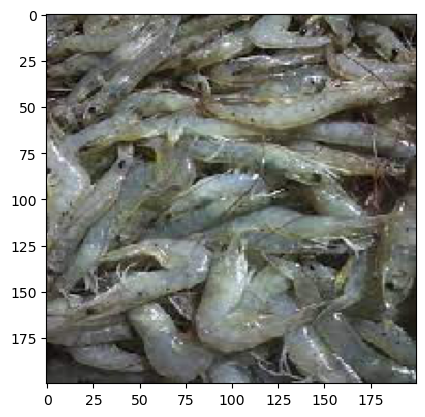

1/1 [==============================] - 0s 61ms/step
blackspot


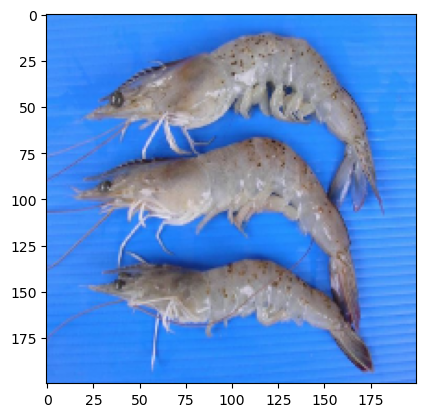

1/1 [==============================] - 0s 48ms/step
blackspot


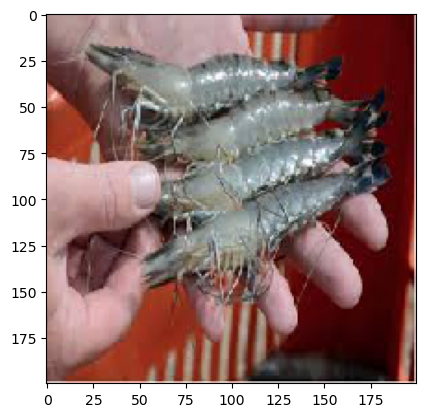

1/1 [==============================] - 0s 49ms/step
whitespot


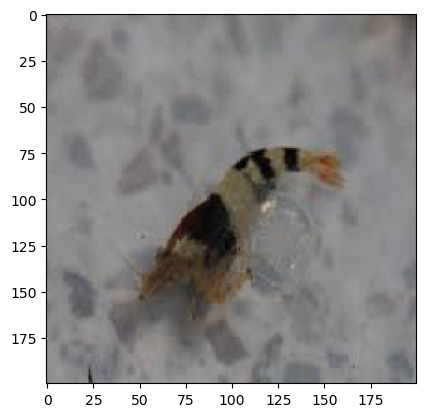

1/1 [==============================] - 0s 50ms/step
whitespot


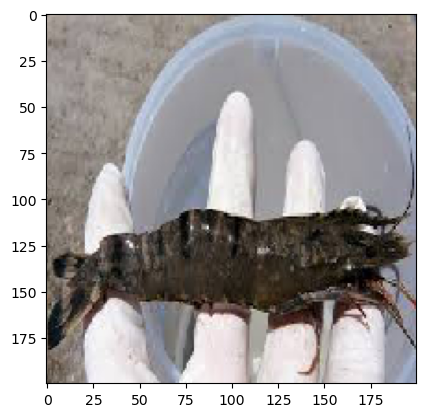

1/1 [==============================] - 0s 58ms/step
whitespot


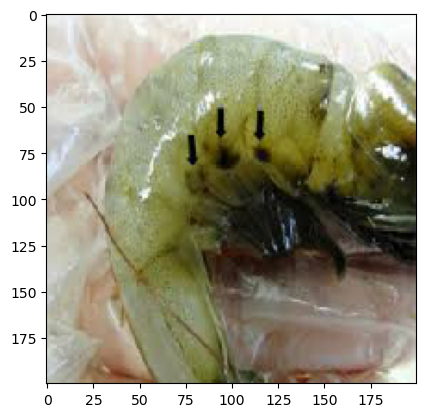

1/1 [==============================] - 0s 53ms/step
whitespot


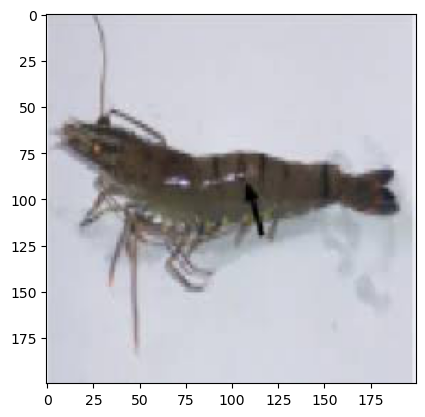

1/1 [==============================] - 0s 55ms/step
whitespot


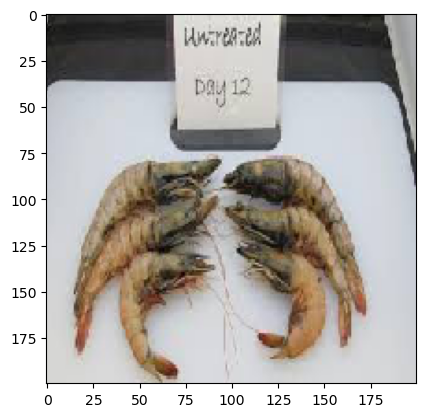

1/1 [==============================] - 0s 64ms/step
whitespot


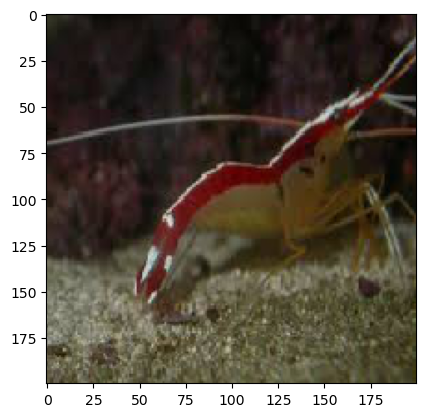

1/1 [==============================] - 0s 44ms/step
blackspot


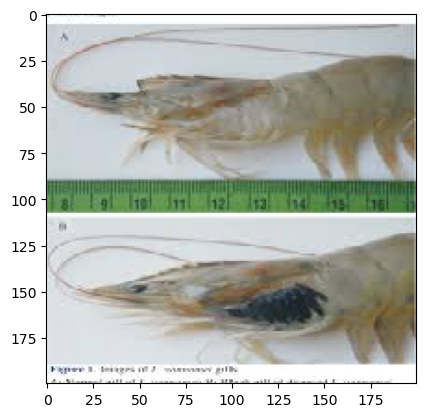

1/1 [==============================] - 0s 54ms/step
whitespot


In [16]:
dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        print('Shell Disease')
    elif predicted_class == 1:
        print('blackspot')
    elif predicted_class == 2:
        print('healthy shrimp')
    elif predicted_class == 3:
        print('whitespot')
from sklearn.metrics import classification_report, confusion_matrix

# Training and evaluation
model_fit = model.fit(train_dataset,
                      steps_per_epoch=30,
                      epochs=10,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)

# Generate predictions for test data
y_true = []
y_pred = []

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)
    
    y_true.append(1)  # Assuming blackspot is class 1
    y_pred.append(predicted_class)

# Compute performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))



In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Training and evaluation
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=10,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)

# Generate predictions for test data
y_true = []
y_pred = []

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)
    
    y_true.append(1)  # Assuming blackspot is class 1
    y_pred.append(predicted_class)

# Compute performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/10
5/5 [==============================] - 3s 822ms/step - loss: 1.0257 - accuracy: 0.6000 - val_loss: 1.1782 - val_accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 4s 932ms/step - loss: 0.8387 - accuracy: 0.8000 - val_loss: 0.7428 - val_accuracy: 0.7333
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 0.4045 - accuracy: 0.9333 - val_loss: 0.5405 - val_accuracy: 0.7333
Epoch 4/10
5/5 [==============================] - 5s 1s/step - loss: 0.5422 - accuracy: 0.7333 - val_loss: 0.4013 - val_accuracy: 0.8667
Epoch 5/10
5/5 [==============================] - 4s 1s/step - loss: 0.2977 - accuracy: 1.0000 - val_loss: 1.2572 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.6522 - accuracy: 0.7333 - val_loss: 0.6817 - val_accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 4s 923ms/step - loss: 0.4552 - accuracy: 0.8000 - val_loss: 0.7583 - val_accuracy: 0.8000
Epoch 8/10
5/5 [================

C:\Users\Mr\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Found 158 images belonging to 4 classes.
Found 129 images belonging to 4 classes.
Enter Tensordash Password :········
Epoch 1/30
5/5 [==============================] - 5s 1s/step - loss: 5.8268 - accuracy: 0.0667 - val_loss: 1.1917 - val_accuracy: 0.5333
Epoch 2/30
5/5 [==============================] - 3s 718ms/step - loss: 1.4058 - accuracy: 0.2857 - val_loss: 1.2869 - val_accuracy: 0.2667
Epoch 3/30
5/5 [==============================] - 2s 588ms/step - loss: 1.4650 - accuracy: 0.2143 - val_loss: 1.2680 - val_accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 2s 566ms/step - loss: 1.4047 - accuracy: 0.4000 - val_loss: 1.3170 - val_accuracy: 0.3333
Epoch 5/30
5/5 [==============================] - 4s 1s/step - loss: 1.4075 - accuracy: 0.2000 - val_loss: 1.3078 - val_accuracy: 0.6000
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 1.3552 - accuracy: 0.2667 - val_loss: 1.3390 - val_accuracy: 0.3333
Epoch 7/30
5/5 [==============================] - 4

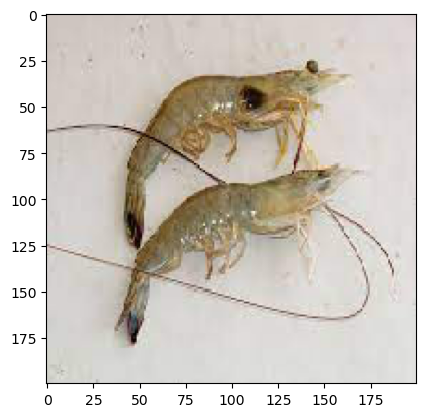

1/1 [==============================] - 0s 97ms/step
healthy shrimp


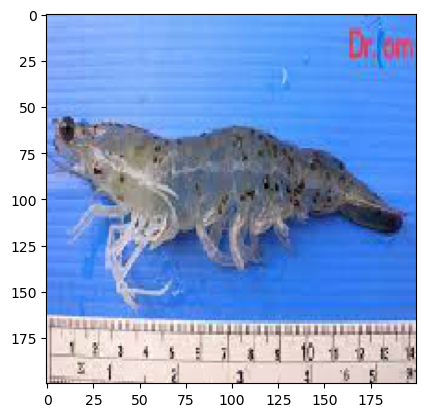

1/1 [==============================] - 0s 21ms/step
blackspot


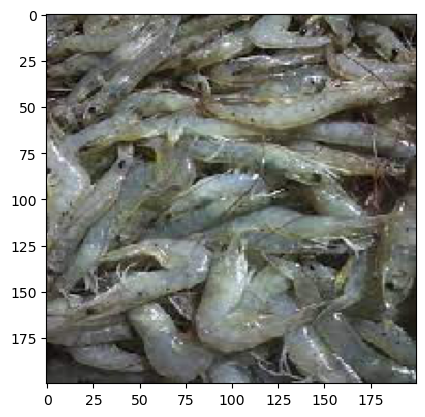

1/1 [==============================] - 0s 30ms/step
blackspot


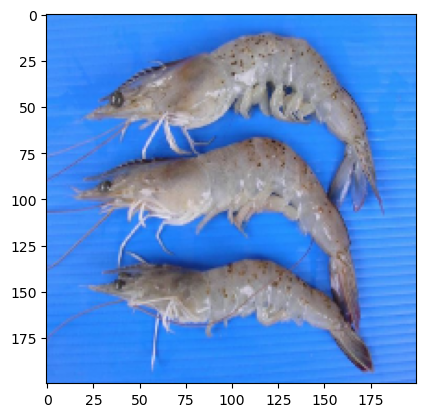

1/1 [==============================] - 0s 22ms/step
blackspot


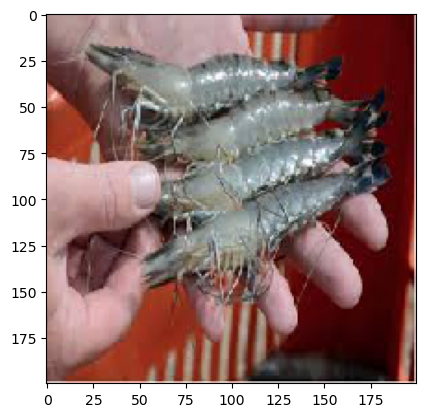

1/1 [==============================] - 0s 19ms/step
whitespot


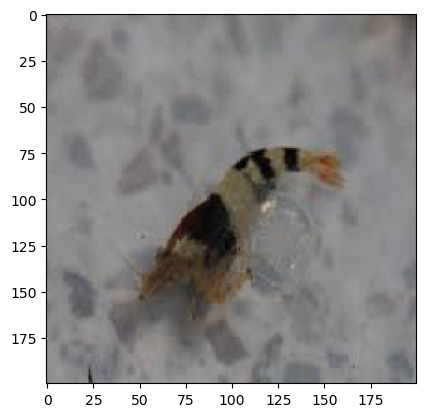

1/1 [==============================] - 0s 25ms/step
blackspot


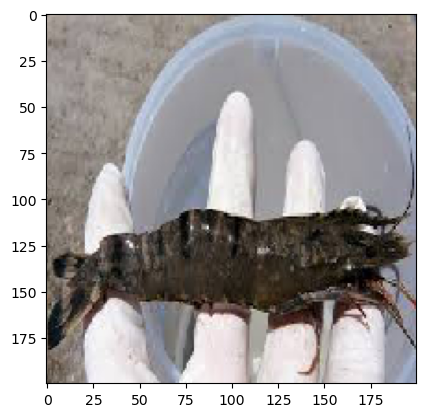

1/1 [==============================] - 0s 28ms/step
blackspot


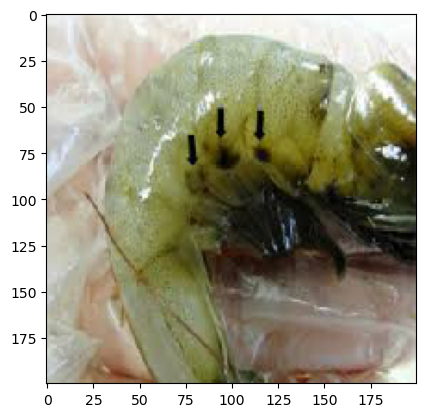

1/1 [==============================] - 0s 16ms/step
blackspot


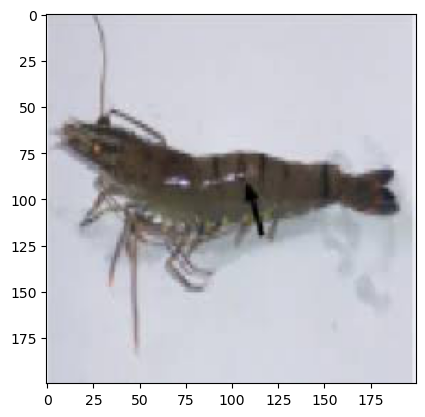

1/1 [==============================] - 0s 36ms/step
blackspot


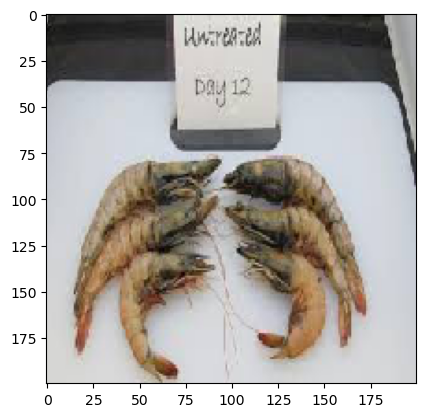

1/1 [==============================] - 0s 15ms/step
blackspot


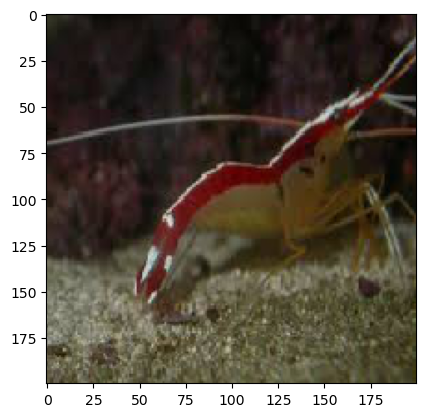

1/1 [==============================] - 0s 20ms/step
blackspot


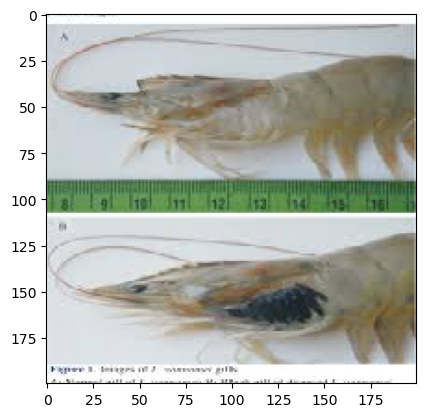

1/1 [==============================] - 0s 28ms/step
blackspot
Epoch 1/30
5/5 [==============================] - 4s 992ms/step - loss: 1.1308 - accuracy: 0.5333 - val_loss: 0.7921 - val_accuracy: 0.8667
Epoch 2/30
5/5 [==============================] - 4s 861ms/step - loss: 0.5497 - accuracy: 1.0000 - val_loss: 2.6867 - val_accuracy: 0.4667
Epoch 3/30
5/5 [==============================] - 4s 1s/step - loss: 0.8808 - accuracy: 0.5714 - val_loss: 0.9211 - val_accuracy: 0.7333
Epoch 4/30
5/5 [==============================] - 4s 989ms/step - loss: 0.6746 - accuracy: 0.7333 - val_loss: 1.6696 - val_accuracy: 0.4667
Epoch 5/30
5/5 [==============================] - 2s 551ms/step - loss: 0.8962 - accuracy: 0.6667 - val_loss: 1.2149 - val_accuracy: 0.6667
Epoch 6/30
5/5 [==============================] - 3s 721ms/step - loss: 1.4843 - accuracy: 0.5333 - val_loss: 1.0019 - val_accuracy: 0.7333
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.6186 - accuracy: 0.8000 - val_

C:\Users\Mr\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mr\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mr\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
img = image.load_img(r"C:\Users\Mr\Downloads\archive\train\f3d244f1-8a4b-4331-9851-810c827f80db_png.rf.558ede861efb75897f43ef0ef6e1a333.jpg")
cv2.imread(r"C:\Users\Mr\Downloads\archive\train\f3d244f1-8a4b-4331-9851-810c827f80db_png.rf.558ede861efb75897f43ef0ef6e1a333.jpg").shape
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale = 1/255)
train_dataset=train.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\train',
                                        target_size=(200,200),
                                        batch_size= 3,
                                        class_mode='categorical')
validation_dataset=validation.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\valid',
                                        target_size=(200,200),
                                        batch_size= 3,
                                        class_mode='categorical')
train_dataset.class_indices
num_classes = 4
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),  # Additional dense layer
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Multi-class classification
])
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

from tensordash.tensordash import Tensordash
histories = Tensordash(ModelName='state', email='harshithamandula7@gmail.com')
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        print('Shell Disease')
    elif predicted_class == 1:
        print('blackspot')
    elif predicted_class == 2:
        print('healthy shrimp')
    elif predicted_class == 3:
        print('whitespot')
        
    from sklearn.metrics import classification_report, confusion_matrix

# Training and evaluation
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)

# Generate predictions for test data
y_true = []
y_pred = []

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)
    
    y_true.append(1)  # Assuming blackspot is class 1
    y_pred.append(predicted_class)

# Compute performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

img = image.load_img('C:\\Users\\Mr\\Downloads\\Image_10.png')
plt.imshow(img)
cv2.imread("C:\\Users\\Mr\\Downloads\\Image_10.png").shape

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\train',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

validation_dataset = validation.flow_from_directory('C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\valid',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

num_classes = 4  # Number of classes

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),  # Additional dense layer
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Multi-class classification
])

model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

from tensordash.tensordash import Tensordash
histories = Tensordash(ModelName='state', email='harshithamandula7@gmail.com')

model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      callbacks=[histories],
                      validation_data=validation_dataset,
                      validation_steps=5)

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\


whitespot'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        print('Shell Disease')
    elif predicted_class == 1:
        print('blackspot')
    elif predicted_class == 2:
        print('healthy shrimp')
    elif predicted_class == 3:
        print('whitespot')


In [17]:
from joblib import dump

# Save the model to a file
model_file = 'shrimpdisease.pkl'  # Name of the file to save the model
dump(model, model_file)

['shrimpdisease.pkl']

In [1]:
from sklearn.metrics import classification_report

# Make predictions on the test dataset
y_true = 
y_pred = 

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        y_pred.append('Shell Disease')
    elif predicted_class == 1:
        y_pred.append('blackspot')
    elif predicted_class == 2:
        y_pred.append('healthy shrimp')
    elif predicted_class == 3:
        y_pred.append('whitespot')
    
    # Extract true labels from the image directory
    if 'Shell Disease' in i:
        y_true.append('Shell Disease')
    elif 'blackspot' in i:
        y_true.append('blackspot')
    elif 'healthy shrimp' in i:
        y_true.append('healthy shrimp')
    elif 'whitespot' in i:
        y_true.append('whitespot')

# Print classification report
print(classification_report(y_true, y_pred))


NameError: name 'os' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Extract true labels and predicted labels for the test dataset
y_true = []
y_pred = []

dir_path = 'C:\\Users\\Mr\\Downloads\\white black shell-20231201T113710Z-001\\white black shell\\data\\test\\blackspot'
for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        y_pred.append('Shell Disease')
    elif predicted_class == 1:
        y_pred.append('blackspot')
    elif predicted_class == 2:
        y_pred.append('healthy shrimp')
    elif predicted_class == 3:
        y_pred.append('whitespot')
    
    # Extract true labels from the image directory
    if 'blackspot' in i:
        y_true.append('blackspot')
    # Add other conditions for other classes if necessary

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
